<a href="https://colab.research.google.com/github/bruno-albino/exploratory-analysis-ifsp/blob/main/Analise_exploratoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Top 8800 Twitch Streamers**
### Top of the best streams based on watch time.

###### Nome: Bruno da Silva Albino CP: 300273X
###### Nome: Eduardo Bueno CP: 300273X
---


Disciplina: Inteligência Artificial

Professor: Samuel Martins


---



In [170]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# estilos padrão para os plots/visualizações
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

### **1. Dataset**
----
Dataset: Top 8800 Twitch Streamers: https://www.kaggle.com/girlazo/top-8800-twitch-*streamers*

Este dataset possui 8800 linhas, listando os melhores streamers do mundo na plataforma de stream Twitch, baseado em tempo assistido pelos usuários. Cada registro possui o nome do streamer, a quantidaded de vies e assinantes do canal, e outras informações como os três jogos mais jogados de cada streamer




#### **1.1 Importando o Dataset**

In [171]:
data = pd.read_csv('/content/drive/MyDrive/TwitchDataSet.csv')

In [172]:
data.head()

,profile picture,top count,screen name,watch time,stream time,peak viewers,average viewers,followers,followers gained,views gained,partnered,mature,language,completa name,first category,second category,third category
0,https://static-cdn.jtvnw.net/jtv_user_pictures...,1,xQcOW,7333609065,215670,222720,32913,3691010,2051895,109735389,True,False,English,xQcOW,Just Chatting,Among Us,Overwatch
1,https://static-cdn.jtvnw.net/jtv_user_pictures...,2,Gaules,6314532585,515595,387315,12254,1966465,1141123,112807468,True,True,Portuguese,Gaules,Counter-Strike: Global Offensive,Among Us,PLAYERUNKNOWN
2,https://static-cdn.jtvnw.net/jtv_user_pictures...,3,summit1g,6235007490,216000,310998,25931,5374710,1402547,91501875,True,False,English,summit1g,Escape From Tarkov,Sea of Thieves,Grand Theft Auto V
3,https://static-cdn.jtvnw.net/jtv_user_pictures...,4,ESL_CSGO,4764929775,517965,300575,9249,4195657,870484,126008641,True,False,English,ESL_CSGO,Counter-Strike: Global Offensive,NaN,NaN
4,https://static-cdn.jtvnw.net/jtv_user_pictures...,5,NICKMERCS,3853252845,131880,163241,29183,4415637,1337535,49164651,True,False,English,NICKMERCS,Call Of Duty: Modern Warfare,Fortnite,Halo: The Master Chief Collection


#### **1.2 Informações básicas**

In [173]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8800 entries, 0 to 8799
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   profile picture   8800 non-null   object
 1   top count         8800 non-null   int64 
 2   screen name       8800 non-null   object
 3   watch time        8800 non-null   int64 
 4   stream time       8800 non-null   int64 
 5   peak viewers      8800 non-null   int64 
 6   average viewers   8800 non-null   int64 
 7   followers         8800 non-null   int64 
 8   followers gained  8800 non-null   int64 
 9   views gained      8800 non-null   int64 
 10  partnered         8800 non-null   bool  
 11  mature            8800 non-null   bool  
 12  language          8799 non-null   object
 13  completa name     8800 non-null   object
 14  first category    8795 non-null   object
 15  second category   8390 non-null   object
 16  third category    8009 non-null   object
dtypes: bool(2), in

In [174]:
print(f'O dataset possui {data.shape[0]} registros/observações/linhas e {data.shape[1]} atributos/variáveis/colunas. Alguns atributos possuem atributos null (p. ex., "language") que precisará ser tratado, mas todos já possuem os tipos corretos')

O dataset possui 8800 registros/observações/linhas e 17 atributos/variáveis/colunas. Alguns atributos possuem atributos null (p. ex., "language") que precisará ser tratado, mas todos já possuem os tipos corretos


### **2. Limpeza e Pré-processamento de Dados**
---

In [175]:
df = data.copy()

In [176]:
df.head()

,profile picture,top count,screen name,watch time,stream time,peak viewers,average viewers,followers,followers gained,views gained,partnered,mature,language,completa name,first category,second category,third category
0,https://static-cdn.jtvnw.net/jtv_user_pictures...,1,xQcOW,7333609065,215670,222720,32913,3691010,2051895,109735389,True,False,English,xQcOW,Just Chatting,Among Us,Overwatch
1,https://static-cdn.jtvnw.net/jtv_user_pictures...,2,Gaules,6314532585,515595,387315,12254,1966465,1141123,112807468,True,True,Portuguese,Gaules,Counter-Strike: Global Offensive,Among Us,PLAYERUNKNOWN
2,https://static-cdn.jtvnw.net/jtv_user_pictures...,3,summit1g,6235007490,216000,310998,25931,5374710,1402547,91501875,True,False,English,summit1g,Escape From Tarkov,Sea of Thieves,Grand Theft Auto V
3,https://static-cdn.jtvnw.net/jtv_user_pictures...,4,ESL_CSGO,4764929775,517965,300575,9249,4195657,870484,126008641,True,False,English,ESL_CSGO,Counter-Strike: Global Offensive,NaN,NaN
4,https://static-cdn.jtvnw.net/jtv_user_pictures...,5,NICKMERCS,3853252845,131880,163241,29183,4415637,1337535,49164651,True,False,English,NICKMERCS,Call Of Duty: Modern Warfare,Fortnite,Halo: The Master Chief Collection


#### **2.1 Removendo colunas não utilizadas**
O dataset possui colunas como a foto e o nome utilizada pelo streamer, o que para a nossa análise não vamos precisar

In [177]:
df = df.drop(columns=['profile picture', 'screen name', 'partnered', 'completa name'])

In [178]:
df.head()

,top count,watch time,stream time,peak viewers,average viewers,followers,followers gained,views gained,mature,language,first category,second category,third category
0,1,7333609065,215670,222720,32913,3691010,2051895,109735389,False,English,Just Chatting,Among Us,Overwatch
1,2,6314532585,515595,387315,12254,1966465,1141123,112807468,True,Portuguese,Counter-Strike: Global Offensive,Among Us,PLAYERUNKNOWN
2,3,6235007490,216000,310998,25931,5374710,1402547,91501875,False,English,Escape From Tarkov,Sea of Thieves,Grand Theft Auto V
3,4,4764929775,517965,300575,9249,4195657,870484,126008641,False,English,Counter-Strike: Global Offensive,NaN,NaN
4,5,3853252845,131880,163241,29183,4415637,1337535,49164651,False,English,Call Of Duty: Modern Warfare,Fortnite,Halo: The Master Chief Collection


#### **2.2 Top Count**
Já que este é a posição de cada streamer, vamos checar se há ruídos nesta coluna se está de acordo com a quantidade de registros

In [179]:
print(f'Maximo = {df["top count"].max()}')
print(f'Min = {df["top count"].min()}')

Maximo = 8800
Min = 1


In [180]:
df['top count'].unique()

array([   1,    2,    3, ..., 8798, 8799, 8800])

In [181]:
df['top count'].isnull().sum()

0

Não há valores NaN para a coluna.

#### **2.3 watch time**
Já que este é o dado que elege a posição do streamer, vamos checar se está de acordo

In [182]:
df['watch time'].isnull().sum()

0

In [183]:
max_watch_time = df['watch time'].max()
min_watch_time = df['watch time'].min()

In [184]:
max_place = df[df['watch time'] == max_watch_time]
max_place

,top count,watch time,stream time,peak viewers,average viewers,followers,followers gained,views gained,mature,language,first category,second category,third category
0,1,7333609065,215670,222720,32913,3691010,2051895,109735389,False,English,Just Chatting,Among Us,Overwatch


In [185]:
min_place = df[df['watch time'] == min_watch_time]
min_place

,top count,watch time,stream time,peak viewers,average viewers,followers,followers gained,views gained,mature,language,first category,second category,third category
8799,8800,8827995,165105,2270,50,9194,2921,927197,False,English,Music,PLAYERUNKNOWN,Destiny 2


Como podemos ver, não temos valores nulos e as posições dos streamers estão de acordo com as horas assistidas

#### **2.4 stream time**

Vamos checar se existem *outliers* nesta coluna

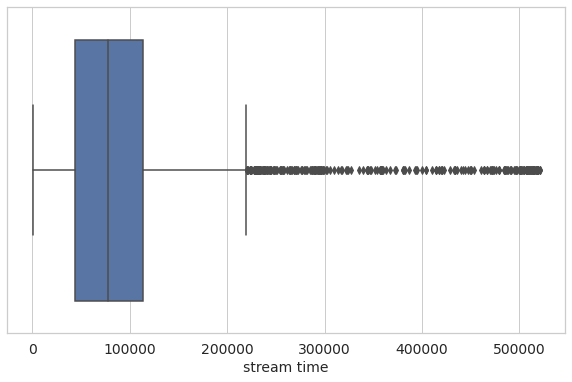

In [186]:
sns.boxplot(x='stream time', data=df)

In [187]:
df['stream time'].isnull().sum()

0

Não temos valores nulos e os outliers são aceitáveis

#### **2.5 mature**
Verificar se existe somente valores booleanos

In [188]:
df['mature'].unique()

array([False,  True])

#### **2.6 Language**
Este é um dos campos que possuem nulos, vamos analisar

In [218]:
df['language'].unique()

array(['English', 'Portuguese', 'Spanish', 'Korean', 'German', 'French',
       'Russian', 'Japanese', 'Turkish', 'Chinese', 'Czech', 'Italian',
       'Polish', 'Thai', 'Arabic', 'Slovak', 'Other', 'Greek',
       'Hungarian', 'Finnish', 'Swedish', 'Romanian', 'Danish', 'Dutch',
       'Chinese (Hong Kong SAR)', 'Bulgarian', 'Norwegian', 'Indonesian'],
      dtype=object)

In [219]:
df['language'].isnull().sum()

0

In [220]:
df[df['language'].isnull()]

,top count,watch time,stream time,peak viewers,average viewers,followers,followers gained,views gained,mature,language,first category,second category,third category


Como esta é uma coluna muito importante para a nossa análise, iremos remover esta entrada nula

In [191]:
df.dropna(subset=['language'], inplace=True)

In [192]:
df['language'].isnull().sum()

0

#### **2.7 Second category**
Vemos que esta coluna possui bastante valores nulos, vamos checar

In [193]:
df['second category'].isnull().sum()

410

In [194]:
second_category_null = df['second category'].isnull()
df[second_category_null]

,top count,watch time,stream time,peak viewers,average viewers,followers,followers gained,views gained,mature,language,first category,second category,third category
3,4,4764929775,517965,300575,9249,4195657,870484,126008641,False,English,Counter-Strike: Global Offensive,NaN,NaN
18,19,2271646785,49470,208341,45406,724511,294841,86113714,False,Korean,League of Legends,NaN,NaN
24,25,1912132740,57570,388794,28581,1107511,678235,33667372,False,English,League of Legends,NaN,NaN
27,28,1868846880,110205,364816,17276,608917,568052,61473607,False,Russian,Counter-Strike: Global Offensive,NaN,NaN
28,29,1852648845,36630,241509,48240,1257562,584326,34436876,False,English,League of Legends,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8693,8694,9085365,108990,345,81,20841,3565,378818,False,Russian,World of Tanks,NaN,NaN
8695,8696,9082995,131565,485,64,876,862,907384,False,English,NBA 2K20,NaN,NaN
8696,8697,9078390,14805,3090,604,100072,89856,320627,False,Portuguese,Fortnite,NaN,NaN
8733,8734,8912745,31905,2022,220,11982,4166,271026,True,Russian,Poker,NaN,NaN


Vemos que temos 410 registros com valores nulos como segunda categoria. Entretando, conseguimos perceber que estes registros também não possuem a terceira categoria. Vamos confirmar

In [195]:
third_category_null = df['third category'].isnull()
df[third_category_null & second_category_null]

,top count,watch time,stream time,peak viewers,average viewers,followers,followers gained,views gained,mature,language,first category,second category,third category
3,4,4764929775,517965,300575,9249,4195657,870484,126008641,False,English,Counter-Strike: Global Offensive,NaN,NaN
18,19,2271646785,49470,208341,45406,724511,294841,86113714,False,Korean,League of Legends,NaN,NaN
24,25,1912132740,57570,388794,28581,1107511,678235,33667372,False,English,League of Legends,NaN,NaN
27,28,1868846880,110205,364816,17276,608917,568052,61473607,False,Russian,Counter-Strike: Global Offensive,NaN,NaN
28,29,1852648845,36630,241509,48240,1257562,584326,34436876,False,English,League of Legends,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8693,8694,9085365,108990,345,81,20841,3565,378818,False,Russian,World of Tanks,NaN,NaN
8695,8696,9082995,131565,485,64,876,862,907384,False,English,NBA 2K20,NaN,NaN
8696,8697,9078390,14805,3090,604,100072,89856,320627,False,Portuguese,Fortnite,NaN,NaN
8733,8734,8912745,31905,2022,220,11982,4166,271026,True,Russian,Poker,NaN,NaN


Já que estes registros possuem valores NaN nas colunas de segundo e terceiro colocado, iremos removê-los

In [196]:
df.dropna(subset=['second category'], inplace=True)

In [197]:
df['second category'].isnull().sum()

0

#### **2.8 Third category**

In [198]:
 df['third category'].isnull().sum()

381

In [ ]:
df[df['third category'].isnull()]

Como agora temos menos valores NaN somente para o terceiro colocado, ao invés de removê-los podemos inserir um texto padrão como "Não informado"

In [204]:
df['third category'].fillna("Não informado", inplace=True)

In [209]:
 df['third category'].isnull().sum()

0

#### **2.9 Removendo duplicados e Correções finais**
Vamos remover os registros duplicados, caso haja algum

In [225]:
df[df.duplicated(keep='first')]

,top count,watch time,stream time,peak viewers,average viewers,followers,followers gained,views gained,mature,language,first category,second category,third category


In [226]:
df.reset_index(drop=True, inplace=True)

In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8389 entries, 0 to 8388
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   top count         8389 non-null   int64 
 1   watch time        8389 non-null   int64 
 2   stream time       8389 non-null   int64 
 3   peak viewers      8389 non-null   int64 
 4   average viewers   8389 non-null   int64 
 5   followers         8389 non-null   int64 
 6   followers gained  8389 non-null   int64 
 7   views gained      8389 non-null   int64 
 8   mature            8389 non-null   bool  
 9   language          8389 non-null   object
 10  first category    8389 non-null   object
 11  second category   8389 non-null   object
 12  third category    8389 non-null   object
dtypes: bool(1), int64(8), object(4)
memory usage: 794.8+ KB


In [228]:
df.head()

,top count,watch time,stream time,peak viewers,average viewers,followers,followers gained,views gained,mature,language,first category,second category,third category
0,1,7333609065,215670,222720,32913,3691010,2051895,109735389,False,English,Just Chatting,Among Us,Overwatch
1,2,6314532585,515595,387315,12254,1966465,1141123,112807468,True,Portuguese,Counter-Strike: Global Offensive,Among Us,PLAYERUNKNOWN
2,3,6235007490,216000,310998,25931,5374710,1402547,91501875,False,English,Escape From Tarkov,Sea of Thieves,Grand Theft Auto V
3,5,3853252845,131880,163241,29183,4415637,1337535,49164651,False,English,Call Of Duty: Modern Warfare,Fortnite,Halo: The Master Chief Collection
4,6,3644124975,161595,68795,19768,533400,437036,684835748,False,English,VALORANT,The Elder Scrolls Online,Genshin Impact


#### 2.10 **Renomeando Colunas**

In [233]:
df = df.rename(columns={
    'top count': 'topCount',
    'watch time': 'watchTime',
    'stream time': 'streamTime',
    'peak viewers': 'peakViewers',
    'average viewers': 'averageViewers',
    'followers gained': 'followersGained',
    'views gained': 'viewsGained',
    'first category': 'firstCategory',
    'second category': 'secondCategory',
    'third category': 'thirdCategory'
})

In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8389 entries, 0 to 8388
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   topCount         8389 non-null   int64 
 1   watchTime        8389 non-null   int64 
 2   streamTime       8389 non-null   int64 
 3   peakViewers      8389 non-null   int64 
 4   averageViewers   8389 non-null   int64 
 5   followers        8389 non-null   int64 
 6   followersGained  8389 non-null   int64 
 7   viewsGained      8389 non-null   int64 
 8   mature           8389 non-null   bool  
 9   language         8389 non-null   object
 10  firstCategory    8389 non-null   object
 11  secondCategory   8389 non-null   object
 12  thirdCategory    8389 non-null   object
dtypes: bool(1), int64(8), object(4)
memory usage: 794.8+ KB


#### **2.11 Salvando o arquivo pré-processado**

In [229]:
df.to_csv('/content/drive/MyDrive/TwitchDataSetProcessado.csv', index=False)